# HW 4 Assignment 4

Nurvirta Monarizqa (nm2773)

In [15]:
from zipfile import ZipFile
try:
    from StringIO import StringIO as sio
except ImportError:
    from io import BytesIO as sio
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
import pandas as pd

#opening file into this notebook
r = urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(sio(r))
citibikedata = z.open('201606-citibike-tripdata.csv')
data = pd.read_csv(citibikedata)
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


# BY GENDER

In [16]:
data['ageM'] = 2016 - data['birth year'][(data['usertype'] == 'Subscriber') & (data['gender'] == 1)]
data['ageF'] = 2016 - data['birth year'][(data['usertype'] == 'Subscriber') & (data['gender'] == 2)]

In [17]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,44.0,NaN
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,49.0,NaN
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,27.0,NaN
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,25.0,NaN
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,27.0,NaN


In [19]:
# dropping NaN values
data['ageM'].dropna(inplace= True)
data['ageF'].dropna(inplace= True)

Populating the interactive namespace from numpy and matplotlib


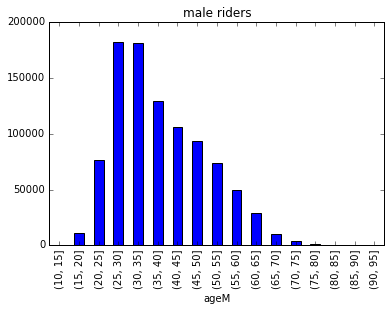

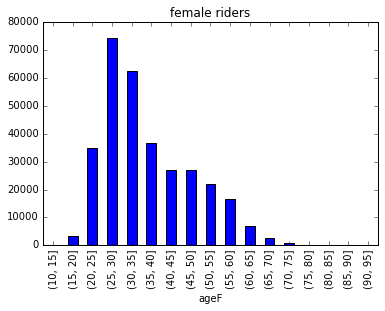

In [24]:
# plotting with age splitted into 10 year bins
import numpy as np
import matplotlib.pylab as pl
%pylab inline
bins = np.arange(10, 99, 5)
axM = data.ageM.groupby(pd.cut(data.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = data.ageF.groupby(pd.cut(data.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

### Figure 1: Histogrammed distribution of riders' ages by gender

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001804
(20, 25]       0.028723
(25, 30]       0.072360
(30, 35]       0.080015
(35, 40]       0.059895
(40, 45]       0.034306
(45, 50]       0.021237
(50, 55]       0.013730
(55, 60]       0.013854
(60, 65]       0.005400
(65, 70]       0.002165
(70, 75]       0.000173
(75, 80]       0.000019
(80, 85]       0.000061
(85, 90]       0.000010
(90, 95]       0.000000


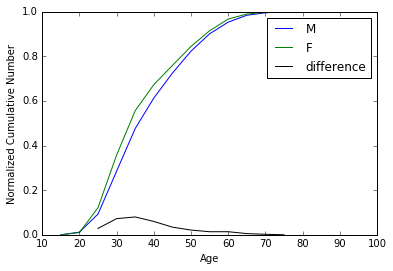

In [25]:
csM=data.ageM.groupby(pd.cut(data.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=data.ageF.groupby(pd.cut(data.ageF, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Figure 2: the cumulative distribution of CitiBike riders' ages by gender

Let's run tests with hypothesis as follows:
### Null hypothesis: 
the distribution of ages is different for male and female riders.

$H_0 : D_{male} \neq D_{female}$

$H_1 : D_{male} = D_{female}$

## KS tests
$\alpha = 0.05$

$c(\alpha) = 1.36$

In [29]:
import scipy.stats

ks = scipy.stats.ks_2samp(data.ageM, data.ageF)
print (ks)
       
rej_condition = 1.36*np.sqrt((len(data.ageM)+len(data.ageF))/(len(data.ageM)*len(data.ageF)))

if ks[0] > rej_condition:
    print("Null hypothesis is rejected")
else:
    print("Do not reject null hypothesis")

Ks_2sampResult(statistic=0.082706883585128677, pvalue=0.0)
Null hypothesis is rejected


### Redo KS test with a subsample of the data: take only 1 ride per 200

In [37]:
ageM_sample = data.ageM[np.arange(0,len(data.ageM),200)]
ageF_sample = data.ageF[np.arange(0,len(data.ageF),200)]

In [39]:
ks = scipy.stats.ks_2samp(ageM_sample, ageF_sample)
print (ks)
       
rej_condition = 1.36*np.sqrt((len(ageM_sample)+len(ageF_sample))/(len(ageM_sample)*len(ageF_sample)))

if ks[0] > rej_condition:
    print("Null hypothesis is rejected")
else:
    print("Do not reject null hypothesis")

Ks_2sampResult(statistic=0.42717212178818542, pvalue=6.0599294800281781e-189)
Null hypothesis is rejected


## Pearson's test

In [71]:
# size choosen = the size of ageF column
len(data.ageF)

314575

In [80]:
# reindex the ageM so that when we do sampling, we did not end up get NaN
ageM = data.ageM.copy()
ageM.index = range(len(ageM))

# sampling ageM using linspace and sort
step = np.linspace(1,len(ageM)-1,len(data.ageF)).astype(int)
ageM = ageM[step]
ageM.sort_values(inplace = True)

# sort ageF
ageF = data.ageF.copy()
ageF.sort_values(inplace = True)

In [81]:
len(ageM)

314575

In [82]:
# now they are sorted and have the same size
scipy.stats.pearsonr(ageM,ageF)

(0.99610975998127294, 0.0)

It returns pearson's r equals **0.99610975998127294** very close to 1, this means that **there is a strong relationship between male age distribution and female age distribution with p value = 0.0 (confidence level almost 100%)**.
Null hypothesis is rejected.

## Spearman's test

In [85]:
scipy.stats.spearmanr(ageM,ageF)

SpearmanrResult(correlation=0.9990470421086769, pvalue=0.0)

It returns sparman's r equals **0.9990470421086769** very close to 1, this means that **there is a strong relationship between male age distribution and female age distribution with p value = 0.0 (confidence level almost 100%)**. Null hypothesis is rejected.

# DAY VS NIGHT

In [172]:
data2 = data.copy()

# select only necessary columns
data2 = data2.iloc[:,[1,13]]

# convert starttime to datetime format
data2["starttime"] = pd.to_datetime(data2["starttime"],format="%m/%d/%Y %H:%M:%S")

# get the hour
data2["hour"] = data2.starttime.dt.hour

# day or night
def dayornight(hour):
    if (hour >= 6 and hour < 18):
        return "D"
    else:
        return "N"

data2["daynight"] = data2["hour"].apply(dayornight)
data2.head()

,starttime,birth year,hour,daynight
0,2016-06-01 00:00:18,1972.0,0,N
1,2016-06-01 00:00:20,1967.0,0,N
2,2016-06-01 00:00:21,1989.0,0,N
3,2016-06-01 00:00:28,1991.0,0,N
4,2016-06-01 00:00:53,1989.0,0,N


In [174]:
# get age
data2['ageDay'] = 2016 - data2['birth year'][(data2['daynight'] == "D")]
data2['ageNight'] = 2016 - data2['birth year'][(data2['daynight'] == "N")]
data2.head()

,starttime,birth year,hour,daynight,ageDay,ageNight
0,2016-06-01 00:00:18,1972.0,0,N,NaN,44.0
1,2016-06-01 00:00:20,1967.0,0,N,NaN,49.0
2,2016-06-01 00:00:21,1989.0,0,N,NaN,27.0
3,2016-06-01 00:00:28,1991.0,0,N,NaN,25.0
4,2016-06-01 00:00:53,1989.0,0,N,NaN,27.0


In [ ]:
# dropping NaN values
data2['ageDay'].dropna(inplace= True)
data2['ageNight'].dropna(inplace= True)

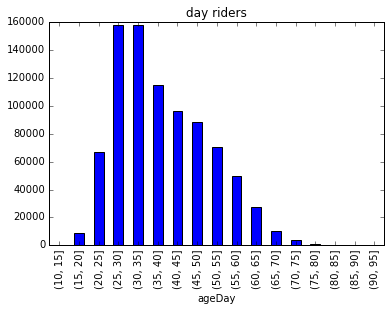

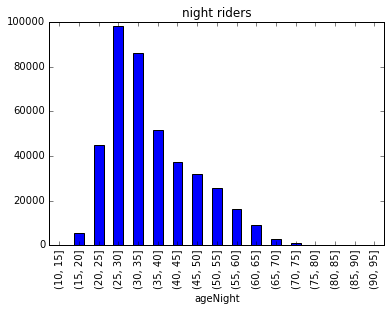

In [176]:
bins = np.arange(10, 99, 5)
axD = data2.ageDay.groupby(pd.cut(data2.ageDay, bins)).agg([np.count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = data2.ageNight.groupby(pd.cut(data2.ageNight, bins)).agg([np.count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night riders")

### Figure 3: histogrammed distribution of riders' ages by day/night
Looks like the distribution shows the same pattern. Let's normalize it:

          count_nonzero
ageDay                 
(10, 15]       0.000000
(15, 20]       0.002776
(20, 25]       0.033857
(25, 30]       0.087671
(30, 35]       0.111850
(35, 40]       0.103510
(40, 45]       0.081178
(45, 50]       0.055512
(50, 55]       0.035822
(55, 60]       0.017357
(60, 65]       0.006978
(65, 70]       0.002470
(70, 75]       0.000335
(75, 80]       0.000085
(80, 85]       0.000026
(85, 90]       0.000002
(90, 95]       0.000000


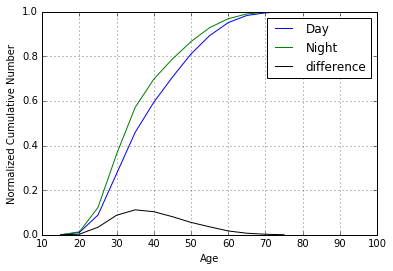

In [178]:
#print df.ageS, df.ageS.cumsum()

csD=data2.ageDay.groupby(pd.cut(data2.ageDay, bins)).agg([count_nonzero]).cumsum()

csN=data2.ageNight.groupby(pd.cut(data2.ageNight, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.grid()
pl.legend()

### Figure 4: the cumulative distribution of CitiBike riders' ages by day/night
They look similar but there is a pair with age difference more than 10%. Let's run a KS test.

### Null hypothesis: 
the distribution of ages is different for day and night riders.

$H_0 : D_{day} \neq D_{night}$

$H_1 : D_{day} = D_{night}$

$\alpha = 0.05$

$c(\alpha) = 1.36$

In [185]:
ks = scipy.stats.ks_2samp(data2.ageDay, data2.ageNight)
print (ks)
       
rej_condition = 1.36*np.sqrt((len(data2.ageDay)+len(data2.ageNight))/(len(data2.ageDay)*len(data2.ageNight)))

if ks[0] > rej_condition:
    print("Null hypothesis is rejected")
else:
    print("Do not reject null hypothesis")

Ks_2sampResult(statistic=0.30322710532911329, pvalue=0.0)
Null hypothesis is rejected


### Null hypothesis is rejected, thus, the distributions are the same between day riders and night riders.